<a href="https://colab.research.google.com/github/guoren1014/PISA-student-QQQ/blob/main/Week_9_Class_Exercise_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!git clone https://github.com/guoren1014/PISA-student-QQQ.git

fatal: destination path 'PISA-student-QQQ' already exists and is not an empty directory.


In [2]:
!pip install pyreadstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
folder_path = '/content/drive/My Drive/Colab Notebooks/Database Management'


In [10]:
import zipfile
import os

# Extract all .zip files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(folder_path, file_name), 'r') as zip_ref:
            zip_ref.extractall(folder_path)  # Extract to the same folder


In [11]:
# List all files in the folder to see the extracted contents
for file_name in os.listdir(folder_path):
    print(file_name)


CY08MSP_CODEBOOK_27thJune24.xlsx
SCH_QQQ_SAS.zip
TCH_QQQ_SAS.zip
CRT_SAS.zip
STU_TIM_SAS.zip
FLT_SAS.zip
STU_COG_SAS.zip
STU_QQQ_SAS.zip
CY08MSP_SCH_QQQ.FORMAT.SAS
CY08MSP_SCH_QQQ.SAS7BDAT
CY08MSP_TCH_QQQ.FORMAT.SAS
CY08MSP_TCH_QQQ.SAS7BDAT
CY08MSP_CRT_COG.FORMAT.SAS
CY08MSP_CRT_COG.SAS7BDAT
CY08MSP_STU_TIM.SAS7BDAT
CY08MSP_STU_TIM.FORMAT.SAS
CY08MSP_FLT_COG.FORMAT.SAS
CY08MSP_FLT_COG.SAS7BDAT
CY08MSP_FLT_QQQ.FORMAT.SAS
CY08MSP_FLT_QQQ.SAS7BDAT
CY08MSP_FLT_TIM.FORMAT.SAS
CY08MSP_FLT_TIM.SAS7BDAT
CY08MSP_STU_COG.SAS7BDAT
CY08MSP_STU_COG.FORMAT.SAS
CY08MSP_STU_QQQ.FORMAT.SAS
CY08MSP_STU_QQQ.SAS7BDAT


Based on the output, the relevant dataset file for Group 3, CY08MSP_STU_QQQ.SAS7BDAT, is present. Let's proceed with loading this file in Colab using pyreadstat

In [5]:
import pyreadstat
import os

# Define the file path for the dataset
folder_path = '/content/drive/My Drive/Colab Notebooks/Database Management'
data_file_path = os.path.join(folder_path, 'CY08MSP_STU_QQQ.SAS7BDAT')

# Load only the metadata to get column names and labels
_, meta = pyreadstat.read_sas7bdat(data_file_path, metadataonly=True)


In [3]:
import pandas as pd

# Use iterator to load data in chunks
iterator = pd.read_sas(data_file_path, format='sas7bdat', chunksize=1000)

# Retrieve the first chunk and get the column names
first_chunk = next(iterator)
print(first_chunk.columns)


Index(['CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'STRATUM',
       'SUBNATIO', 'REGION', 'OECD',
       ...
       'PV3MPRE', 'PV4MPRE', 'PV5MPRE', 'PV6MPRE', 'PV7MPRE', 'PV8MPRE',
       'PV9MPRE', 'PV10MPRE', 'SENWT', 'VER_DAT'],
      dtype='object', length=1278)


In [6]:
# Search for relevant column names based on keywords
keywords = ['Mother', 'Father', 'Highest education', 'ISCED']
for label, name in zip(meta.column_labels, meta.column_names):
    if any(keyword in label for keyword in keywords):
        print(f"{label}: {name}")


Does your mother have any of the following qualifications: [ISCED level 8]: ST006Q01JA
Does your mother have any of the following qualifications: [ISCED level 7]: ST006Q02JA
Does your mother have any of the following qualifications: [ISCED level 6]: ST006Q03JA
Does your mother have any of the following qualifications: [ISCED level 5]: ST006Q04JA
Does your mother have any of the following qualifications: [ISCED level 4]: ST006Q05JA
Does your father have any of the following qualifications: [ISCED level 8]: ST008Q01JA
Does your father have any of the following qualifications: [ISCED level 7]: ST008Q02JA
Does your father have any of the following qualifications: [ISCED level 6]: ST008Q03JA
Does your father have any of the following qualifications: [ISCED level 5]: ST008Q04JA
Does your father have any of the following qualifications: [ISCED level 4]: ST008Q05JA
In what country were you and your parents born? Mother: ST019BQ01T
In what country were you and your parents born? Father: ST019CQ

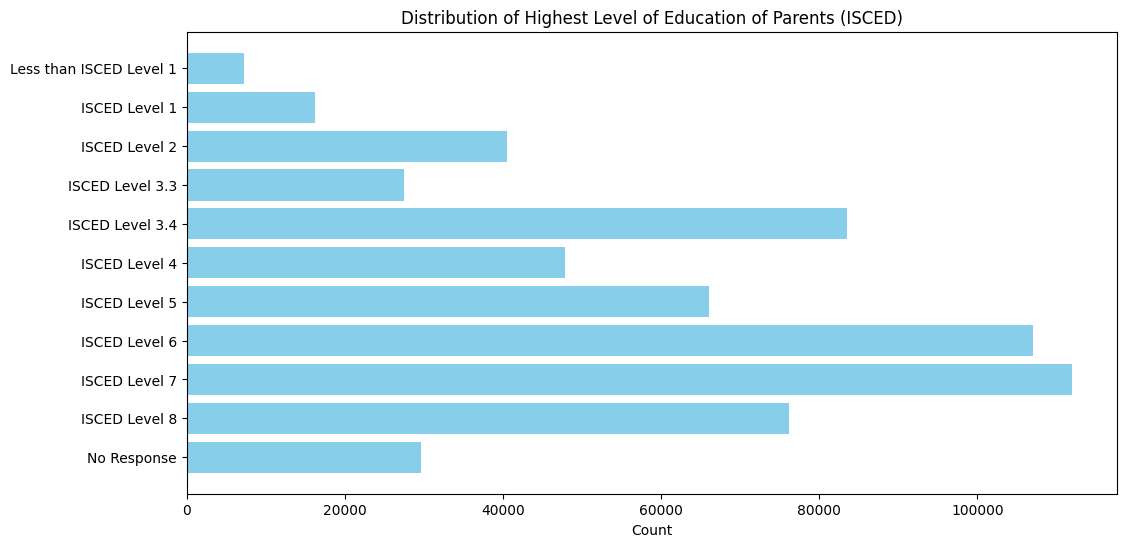

In [3]:
import matplotlib.pyplot as plt

# Data extracted from the codebook for HISCED
hisc_data = {
    "ISCED Level": [
        "Less than ISCED Level 1", "ISCED Level 1", "ISCED Level 2", "ISCED Level 3.3",
        "ISCED Level 3.4", "ISCED Level 4", "ISCED Level 5", "ISCED Level 6",
        "ISCED Level 7", "ISCED Level 8", "No Response"
    ],
    "Count": [
        7252, 16193, 40517, 27485, 83452, 47782, 66105, 107073, 111989, 76200, 29696
    ]
}

# Plot the data
plt.figure(figsize=(12, 6))
plt.barh(hisc_data["ISCED Level"], hisc_data["Count"], color='skyblue')
plt.xlabel("Count")
plt.title("Distribution of Highest Level of Education of Parents (ISCED)")
plt.gca().invert_yaxis()
plt.show()
